# Feed Foreward Neural Network for Rogue Wave Prediction

In this notebook, we model rogue wave characteristics using a Feed Foreward Neural Network (FFNN) regressor. FFNNs ... TBD

To evaluate model performance, we compute multiple regression metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), R² score, and Spearman correlation. MSE penalizes large errors more severely and is sensitive to outliers, while MAE provides a more robust measure of average prediction error. The R² score indicates how much variance in the target is explained by the model, and Spearman correlation assesses whether the model preserves the rank ordering of the predictions, a useful complement to R² when dealing with non-linearities or monotonic relationships.

For interpretability, we apply SHAP (SHapley Additive exPlanations) using the `DeepExplainer`. Unlike tree-based or linear SHAP explainers, `DeepExplainer` is used for any deep learning model... TBD

We compute SHAP values for both the training and test sets. SHAP values on the training data reflect the model's learned dependencies, while test set explanations highlight how well these generalize to unseen examples. Comparing them helps assess overfitting and provides insight into which features consistently drive model predictions across both in-sample and out-of-sample data.

In [1]:
%load_ext autoreload
%autoreload 2

**Imports**

In [2]:
import os
import sys
import pickle
import shap

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


sys.path.append('./')
sys.path.append('../scripts/')
import utils

**Parameter Settings**

In [ ]:
seed = 42

**Data Loading**

We load the data that was preprocessed in `01_data_processing.ipynb`.  

In [ ]:
file_data = "../data/data_train_test.pickle"  # path to the preprocessed data
data_train, data_test, y_train, y_train_cat, X_train, y_test, y_test_cat, X_test = utils.load_data(file_data)

**Data Standardization**

In [ ]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

**Model Training**

In [ ]:
model = ...

**Model Evaluation**

In [ ]:
# Evaluate model on train and test set
utils.evaluate_best_regressor(model, X_train_transformed, y_train, dataset="Training", plot=True)
utils.evaluate_best_regressor(model, X_test_transformed, y_test, dataset="Test", plot=True)

In [ ]:
# Save the model
data_train = pd.DataFrame(X_train_transformed, columns=X_train.columns)
data_train["AI_10min"] = y_train
data_train["AI_10min_cat"] = y_train_cat

data_test = pd.DataFrame(X_test_transformed, columns=X_test.columns)
data_test["AI_10min"] = y_test
data_test["AI_10min_cat"] = y_test_cat

data_and_model = [data_train, data_test, model]

file_data_model = f"../results/ffnn/model_and_data.pickle"
with open(file_data_model, 'wb') as handle:
    pickle.dump(data_and_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

utils.get_model_size(model)

**Model Interpretation**

Interpretation on Training Set

In [3]:
file_shap = f"../results/ffnn/train_shap.pkl"

# Load and unpack the shap values
with open(file_shap, "rb") as handle:
    explanation_train = pickle.load(handle)

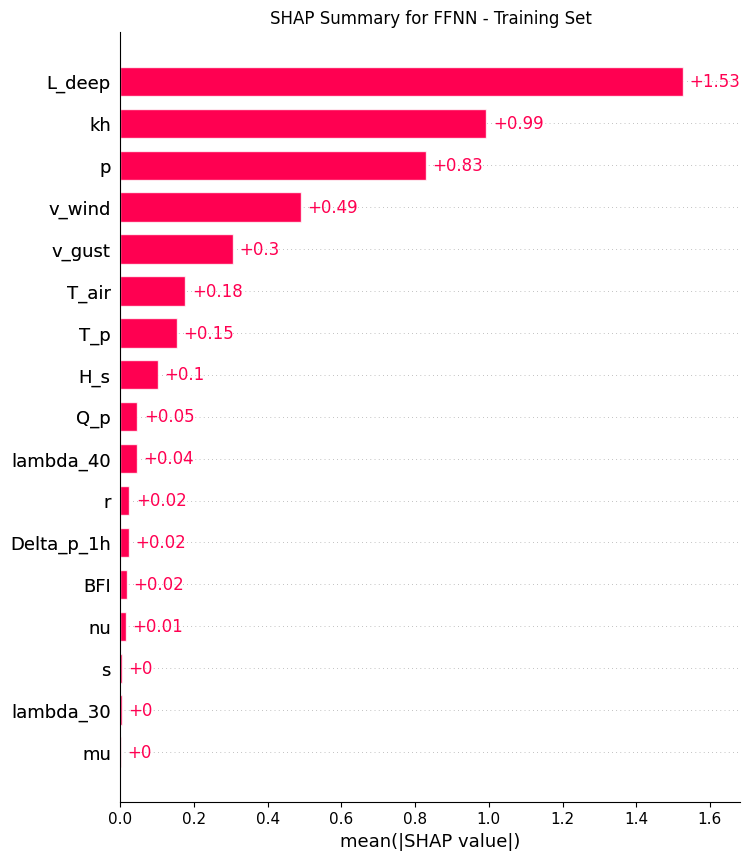

In [4]:
shap.plots.bar(explanation_train, max_display=17, show=False)
plt.title("SHAP Summary for FFNN - Training Set")
plt.show()

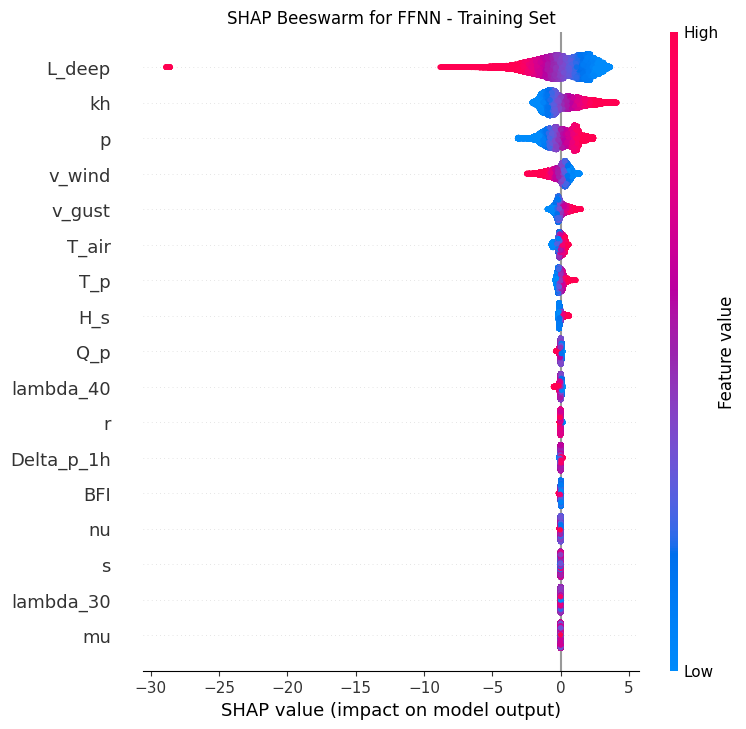

In [5]:
shap.plots.beeswarm(explanation_train, max_display=17, show=False)
plt.title("SHAP Beeswarm for FFNN - Training Set")
plt.show()

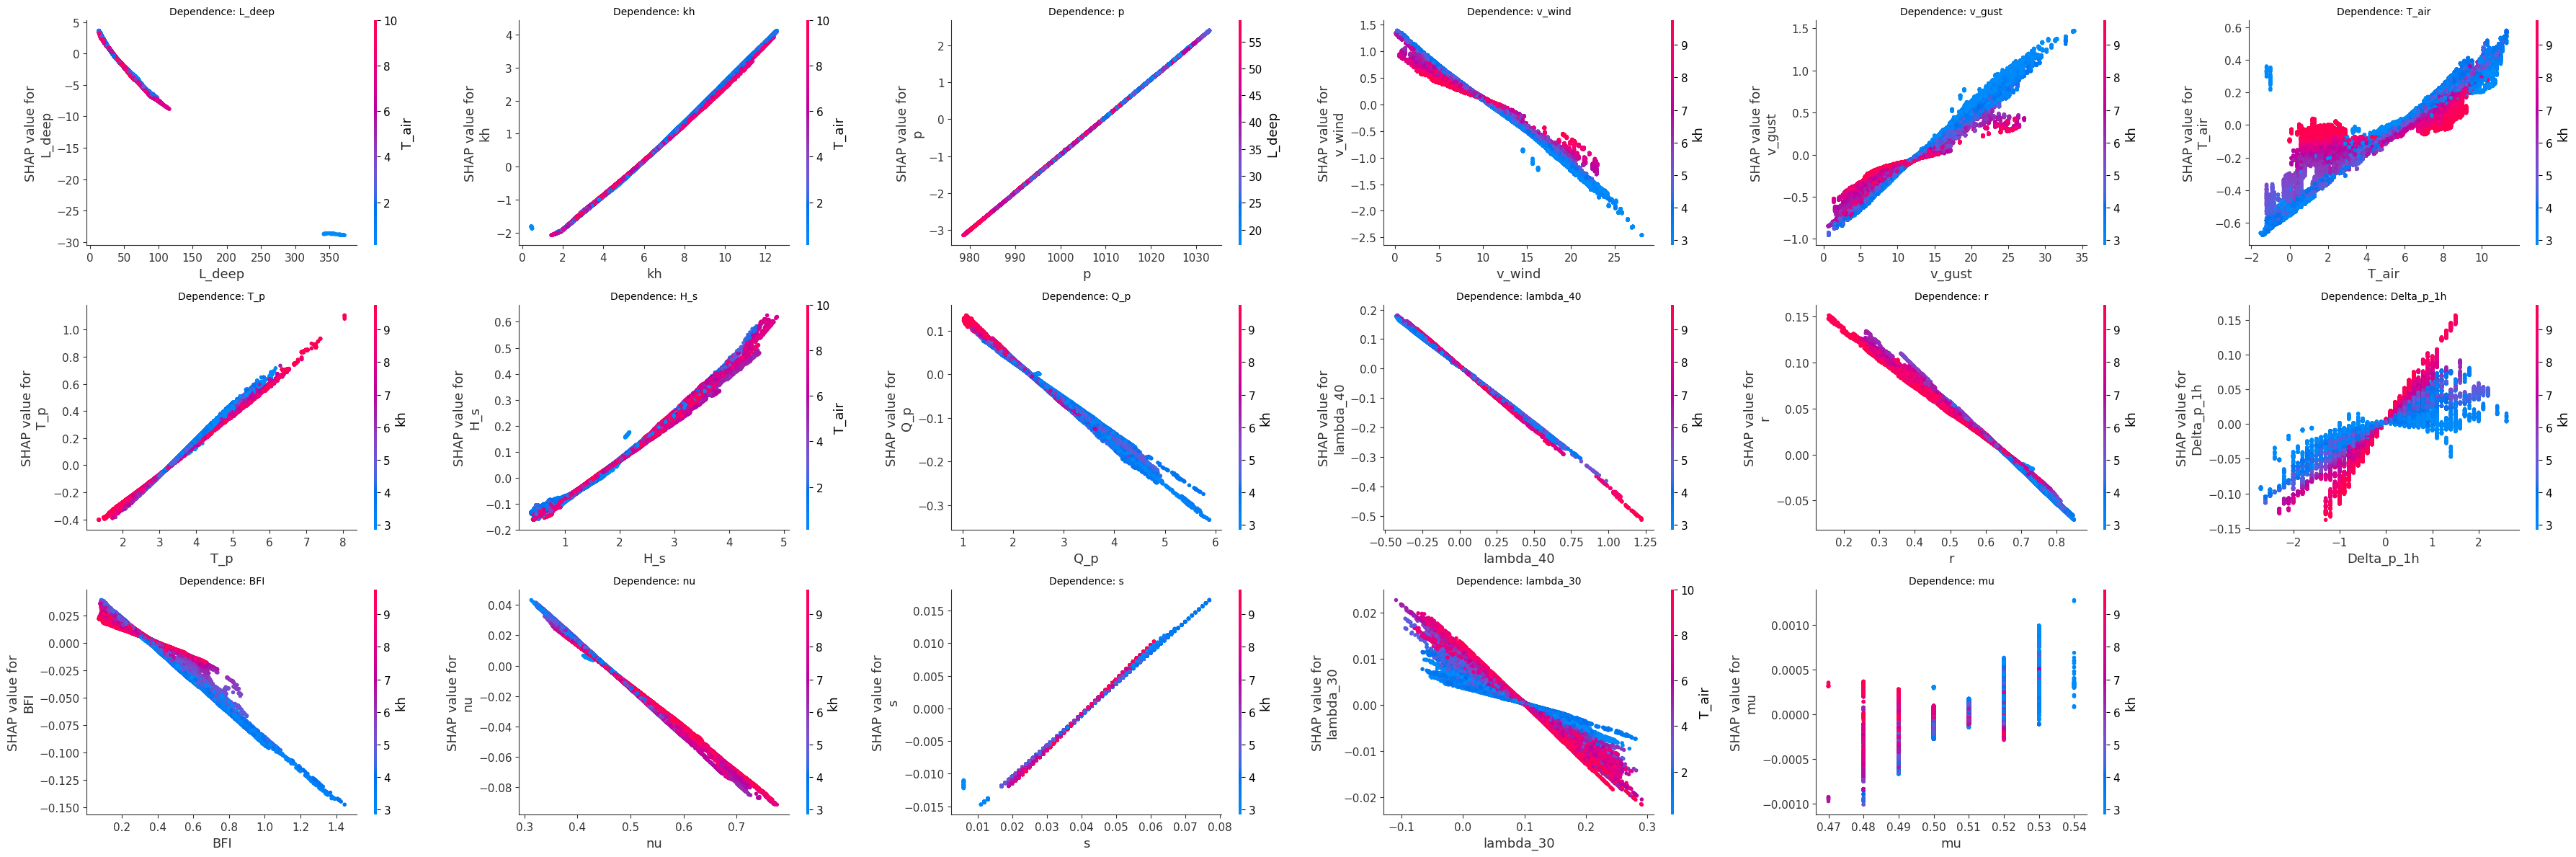

In [6]:
utils.plot_shap_dependence(explanation_train)

Interpretation on Test Set

In [7]:
file_shap = f"../results/ffnn/test_shap.pkl"

# Load and unpack the shap values
with open(file_shap, "rb") as handle:
    explanation_test = pickle.load(handle)

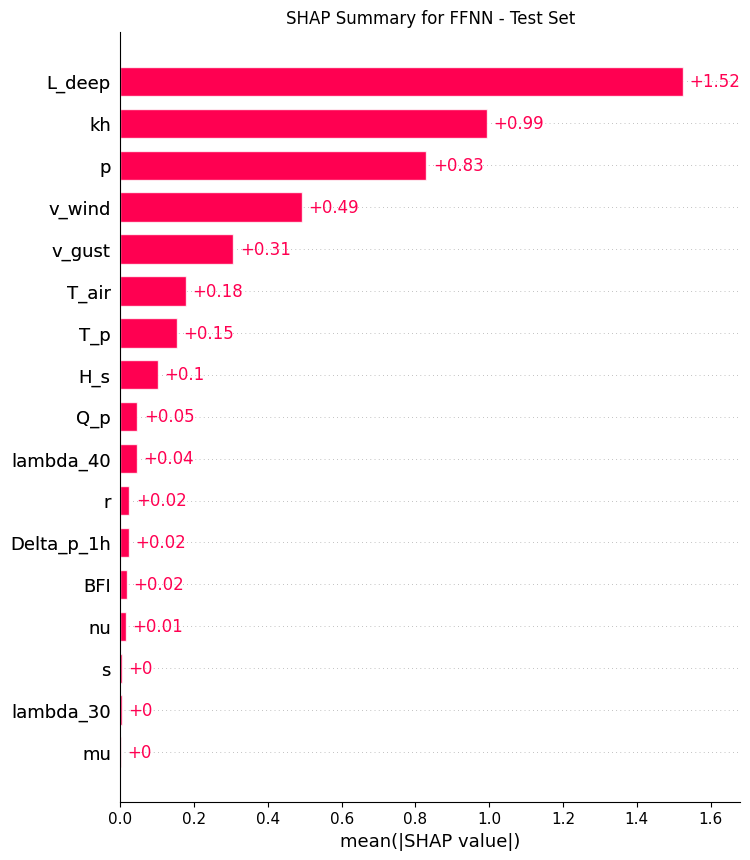

In [8]:
shap.plots.bar(explanation_test, max_display=17, show=False)
plt.title("SHAP Summary for FFNN - Test Set")
plt.show()

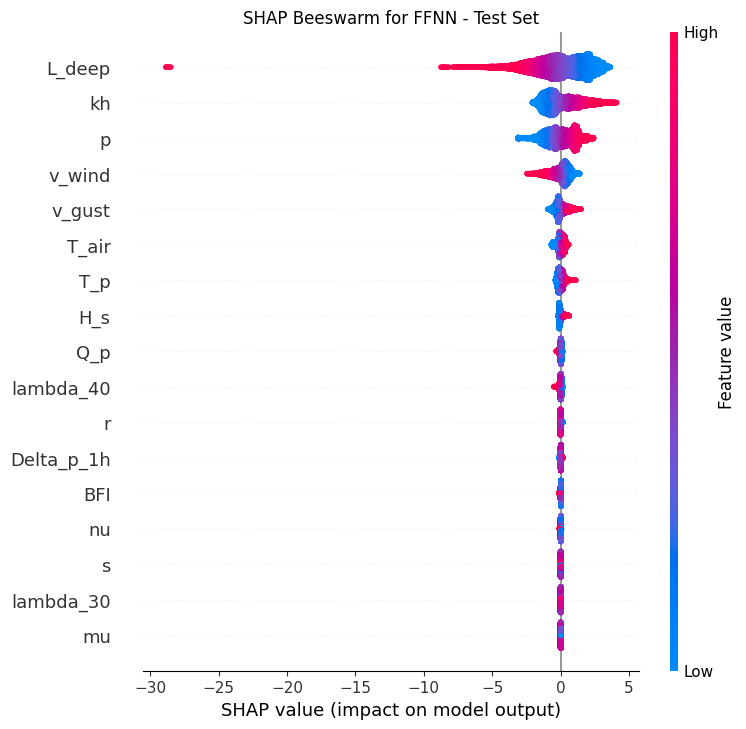

In [9]:
shap.plots.beeswarm(explanation_test, max_display=17, show=False)
plt.title("SHAP Beeswarm for FFNN - Test Set")
plt.show()

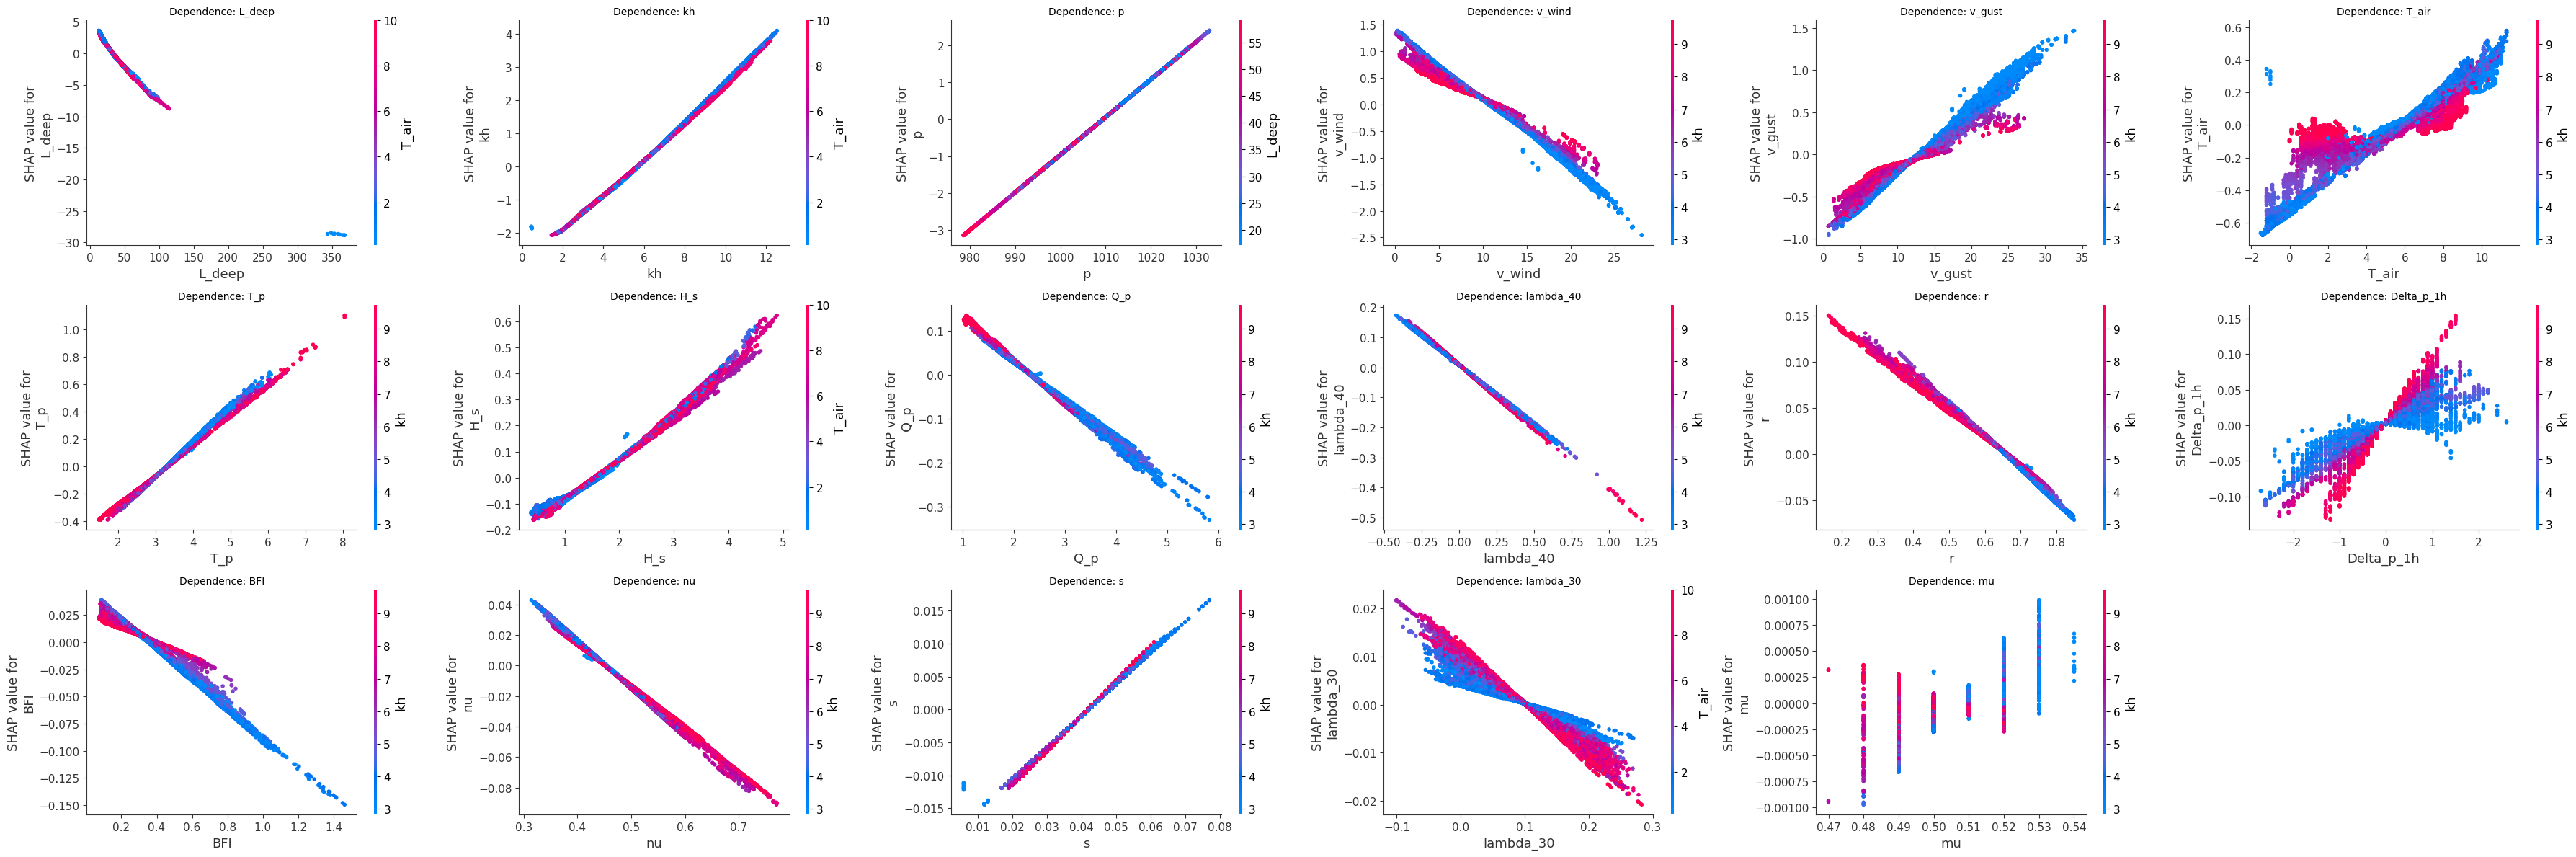

In [10]:
utils.plot_shap_dependence(explanation_test)